#  Consideracion importante: leer la ultima parte.

In [2]:
file_path = "farmers-protest-tweets-2021-2-4.json"

# Estrategias para incrementar la velocidad de procesamiento

Los codigos enfocados a la eficiencia de velocidad de procesamiento implementan varias estrategias para procesar eficientemente grandes volúmenes de datos con un uso mínimo de memoria RAM. A continuación, se detallan estas estrategias:

## 1. Uso de `ujson`
- **Implementación**: `import ujson`
- **Beneficio**: `ujson` es significativamente más rápido que el módulo `json` estándar para parsear JSON.

## 2. Carga Completa en Memoria
- **Técnica**: El archivo JSON completo se carga en memoria utilizando `file.readlines()`.
- **Beneficio**: Esto minimiza el tiempo de I/O (entrada/salida) del disco, que suele ser un cuello de botella. Una vez que el archivo está en memoria, todo el procesamiento se realiza en la RAM, que es mucho más rápida.

## 3. Paralelización Completa
- **Explicación**: El código utiliza multiprocessing.Pool para distribuir el procesamiento de líneas entre múltiples núcleos de CPU disponibles. `num_processes = mp.cpu_count() ` garantiza que se aproveche al máximo el hardware disponible.
- **Beneficio**: Esto permite que múltiples líneas se procesen simultáneamente, lo que reduce significativamente el tiempo total de ejecución en comparación con el procesamiento secuencial.

## 4. Extracción directa de datos
- **Implementación**: `date = datetime.fromisoformat(tweet['date'].replace('Z', '+00:00')).date()`
- **Ventaja**: Conversión rápida y directa de la fecha sin procesamiento adicional.

## 5. Uso eficiente de `heapq.nlargest`
- **Código**: `top_10_dates = heapq.nlargest(10, date_tweet_counts.items(), key=lambda x: x[1])`
- **Eficiencia**: Encuentra los top 10 en tiempo O(n log k), donde k = 10, más rápido que ordenar toda la lista.



In [6]:
import cProfile
import pstats
import io

def profile_function(func, file_path):
    pr = cProfile.Profile()
    pr.enable()
    
    result = func(file_path)
    
    pr.disable()
    s = io.StringIO()
    ps = pstats.Stats(pr, stream=s).sort_stats('cumulative')
    ps.print_stats()
    
    print(s.getvalue())
    print(f"Resultado (primeros 10): {result}")
    
    return result

In [9]:
from q1_time import q1_time
print("Perfilando q1_time:")
result_q1_time = profile_function(q1_time, file_path)


Perfilando q1_time:
         155708 function calls in 1.244 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.047    0.047    1.243    1.243 c:\Users\nicol\OneDrive\Escritorio\LatFirstCommmit\src\q1_time.py:17(q1_time)
        1    0.000    0.000    0.639    0.639 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:362(map)
        4    0.000    0.000    0.639    0.160 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:604(wait)
        4    0.000    0.000    0.639    0.160 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:288(wait)
       19    0.639    0.034    0.639    0.034 {method 'acquire' of '_thread.lock' objects}
        1    0.000    0.000    0.638    0.638 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:767(get)
        1    0.000    0.000    0.638    0.638 c:\Users\nicol\AppData\Local\Progr

In [23]:
from q2_time import q2_time
print("Perfilando q2_time:")
result_q2_time = profile_function(q2_time, file_path)

Perfilando q2_time:
         188496 function calls in 1.277 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.005    0.005    1.277    1.277 c:\Users\nicol\OneDrive\Escritorio\LatFirstCommmit\src\q2_time.py:36(q2_time)
        4    0.000    0.000    0.681    0.170 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:604(wait)
        4    0.000    0.000    0.681    0.170 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:288(wait)
       19    0.681    0.036    0.681    0.036 {method 'acquire' of '_thread.lock' objects}
        1    0.000    0.000    0.681    0.681 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:362(map)
        1    0.000    0.000    0.681    0.681 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:767(get)
        1    0.000    0.000    0.681    0.681 c:\Users\nicol\AppData\Local\Progr

In [26]:
from q3_time import q3_time
print("Perfilando q3_time:")
result_q3_time = profile_function(q3_time, file_path)

Perfilando q3_time:
         309405 function calls in 1.511 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.009    0.009    1.511    1.511 c:\Users\nicol\OneDrive\Escritorio\LatFirstCommmit\src\q3_time.py:15(q3_time)
        4    0.000    0.000    0.890    0.222 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:604(wait)
        4    0.000    0.000    0.890    0.222 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\threading.py:288(wait)
        1    0.000    0.000    0.890    0.890 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:362(map)
       19    0.890    0.047    0.890    0.047 {method 'acquire' of '_thread.lock' objects}
        1    0.000    0.000    0.889    0.889 c:\Users\nicol\AppData\Local\Programs\Python\Python311\Lib\multiprocessing\pool.py:767(get)
        1    0.000    0.000    0.889    0.889 c:\Users\nicol\AppData\Local\Progr

# Estrategias para reducir el consumo de memoria RAM

Los codigos enfocados a la eficiencia de memoria implementan varias estrategias para procesar eficientemente grandes volúmenes de datos con un uso mínimo de memoria RAM. A continuación, se detallan estas estrategias:

## 1. Procesamiento línea por línea
- **Método**: Lee y procesa el archivo JSON línea por línea.
- **Beneficio**: Solo un tweet está en memoria a la vez, reduciendo significativamente el uso de RAM.

## 2. Estructuras de datos eficientes
- **Uso**: Emplea `Counter` y `defaultdict(Counter)` para contar.
- **Ventaja**: Más eficientes en memoria que diccionarios personalizados para conteo.

## 3. Heap para top 10
- **Implementación**: Mantiene un heap de tamaño fijo (10 elementos) para los top 10 días.
- **Eficiencia**: Evita ordenar toda la lista de días al final, ahorrando memoria.

## 4. Procesamiento incremental
- **Método**: Actualiza conteos y heap mientras lee el archivo.
- **Beneficio**: Evita almacenar todos los datos para procesarlos al final.

## 5. Uso de `ujson`
- **Característica**: Más eficiente en memoria que el módulo `json` estándar.

In [7]:
import ujson as json
from collections import Counter
from datetime import datetime
from typing import List, Tuple
import heapq
from memory_profiler import profile

@profile
def q1_memory(file_path: str) -> List[Tuple[datetime.date, str]]:
    date_tweet_counts = Counter()
    date_top_user = {}

    def update_top_user(date, username):
        if date not in date_top_user:
            date_top_user[date] = Counter()
        date_top_user[date][username] += 1

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                tweet = json.loads(line)
                date = datetime.fromisoformat(tweet['date'].replace('Z', '+00:00')).date()
                username = tweet['user']['username']
                
                date_tweet_counts[date] += 1
                update_top_user(date, username)
            except (KeyError, ValueError, json.JSONDecodeError) as e:
                print(f"Error al procesar la línea: {str(e)}")
    
    # Get the top 10 dates with the most tweets
    top_10_dates = heapq.nlargest(10, date_tweet_counts.items(), key=lambda x: x[1])
    
    result = []
    for date, _ in top_10_dates:
        top_user = date_top_user[date].most_common(1)[0][0] if date_top_user[date] else 'Unknown'
        result.append((date, top_user))

    return result


result = q1_memory( file_path)
print(f"Resultado (primeros 10): {result}")

Filename: C:\Users\nicol\AppData\Local\Temp\ipykernel_5012\2726246271.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     8     76.6 MiB     76.6 MiB           1   @profile
     9                                         def q1_memory(file_path: str) -> List[Tuple[datetime.date, str]]:
    10     76.6 MiB      0.0 MiB           1       date_tweet_counts = Counter()
    11     76.6 MiB      0.0 MiB           1       date_top_user = {}
    12                                         
    13     82.1 MiB      0.0 MiB      117408       def update_top_user(date, username):
    14     82.1 MiB      0.0 MiB      117407           if date not in date_top_user:
    15     81.2 MiB      0.0 MiB          13               date_top_user[date] = Counter()
    16     82.1 MiB      0.3 MiB      117407           date_top_user[date][username] += 1
    17                                         
    18     82.1 MiB      0.0 MiB           2       with open(file_path, 'r', encoding='utf-8')

In [16]:
import ujson as json
from collections import Counter
from typing import List, Tuple
import regex
import heapq
from memory_profiler import profile


@profile
def q2_memory(file_path: str) -> List[Tuple[str, int]]:
    def emoji_process(emoji_counts: Counter) -> Counter:

        """
        Función para procesar y combinar componentes de emojis, especialmente los que forman
        banderas, en emojis completos. También maneja otros tipos de emojis, excluyendo 
        modificadores de tono de piel.
        """

        combined = Counter()
        flag_components = {}
        for emoji, count in emoji_counts.items():
             # Detecta y combina los componentes individuales de las banderas (letras de país)
            if len(emoji) == 1 and '\U0001F1E6' <= emoji <= '\U0001F1FF':
                if flag_components:
                    prev_emoji = list(flag_components.keys())[0]
                    combined_emoji = prev_emoji + emoji
                     # Combina los componentes en un solo emoji de bandera
                    combined[combined_emoji] = min(count, emoji_counts[prev_emoji])
                    flag_components.clear()
                else:
                    flag_components[emoji] = count
            elif emoji not in ['\U0001F3FB', '\U0001F3FC', '\U0001F3FD', '\U0001F3FE', '\U0001F3FF']:  # Excluir modificadores de tono de piel
                combined[emoji] = count

        combined.update(flag_components) # Agrega cualquier componente de bandera que quedó sin combinar
        
        return combined

    emoji_counter = Counter()
    emoji_pattern = regex.compile(r'\p{Emoji_Presentation}|\p{Emoji}\uFE0F')
    heap = []
    tweets_processed = 0
    tweets_with_emojis = 0
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                tweet = json.loads(line)
                content = tweet.get('content', '')
                
                if not content:
                    continue
                
                emojis = emoji_pattern.findall(content)
                
                if emojis:
                    tweets_with_emojis += 1
                    for emoji in emojis:
                        emoji_counter[emoji] += 1
                        
                        # Actualizar el heap para mantener solo el top 10 emojis
                        if len(heap) < 10:
                            heapq.heappush(heap, (emoji_counter[emoji], emoji))
                        else:
                            heapq.heappushpop(heap, (emoji_counter[emoji], emoji))
            
            except json.JSONDecodeError:
                print(f"Error al decodificar JSON en la línea {tweets_processed}")
            except Exception as e:
                print(f"Error inesperado en la línea {tweets_processed}: {str(e)}")
    
    combined_counter = emoji_process(emoji_counter)
    
    # Obtener los top 10 emojis más frecuentes desde el heap
    top_10_emojis = heapq.nlargest(10, combined_counter.items(), key=lambda x: x[1])
    
    return top_10_emojis

result = q2_memory( file_path)
print(f"Resultado (primeros 10): {result}")

Filename: C:\Users\nicol\AppData\Local\Temp\ipykernel_23876\1464490711.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     9     79.1 MiB     79.1 MiB           1   @profile
    10                                         def q2_memory(file_path: str) -> List[Tuple[str, int]]:
    11     79.1 MiB      0.0 MiB           2       def emoji_process(emoji_counts: Counter) -> Counter:
    12                                         
    13                                                 """
    14                                                 Función para procesar y combinar componentes de emojis, especialmente los que forman
    15                                                 banderas, en emojis completos. También maneja otros tipos de emojis, excluyendo 
    16                                                 modificadores de tono de piel.
    17                                                 """
    18                                         
    19     79.1 MiB     

In [4]:
from collections import Counter
from typing import List, Tuple
import heapq
import ujson as json
from memory_profiler import profile


@profile
def q3_memory(file_path: str) -> List[Tuple[str, int]]:
    mention_counter = Counter()
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                tweet = json.loads(line)
                mentioned_users = tweet.get('mentionedUsers', [])
                
                if mentioned_users is None:  # Manejar el caso en el que mentionedUsers sea None
                    mentioned_users = []
                
                # Actualiza el contador de menciones directamente
                for user in mentioned_users:
                    mention_counter[user['username']] += 1
            
            except (KeyError, ValueError, json.JSONDecodeError) as e:
                print(f"Error al procesar la línea: {str(e)}")
    
    # Usa heapq para encontrar los 10 usuarios más mencionados
    top_10_users = heapq.nlargest(10, mention_counter.items(), key=lambda x: x[1])

    return top_10_users

result = q3_memory( file_path)
print(f"Resultado (primeros 10): {result}")

Filename: C:\Users\nicol\AppData\Local\Temp\ipykernel_5712\2109630455.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     8     76.0 MiB     76.0 MiB           1   @profile
     9                                         def q3_memory(file_path: str) -> List[Tuple[str, int]]:
    10     76.0 MiB      0.0 MiB           1       mention_counter = Counter()
    11                                             
    12     77.7 MiB      0.0 MiB           2       with open(file_path, 'r', encoding='utf-8') as file:
    13     77.7 MiB      0.4 MiB      117408           for line in file:
    14     77.7 MiB      0.0 MiB      117407               try:
    15     77.7 MiB      0.9 MiB      117407                   tweet = json.loads(line)
    16     77.7 MiB      0.0 MiB      117407                   mentioned_users = tweet.get('mentionedUsers', [])
    17                                                         
    18     77.7 MiB      0.0 MiB      117407                   if me

# Propuesta de Solución Alternativa

> **Nota**: Esta sesión contiene errores y pasos no finalizados; es más un intercambio de ideas que un proceso formalizado.

## Contexto

En el desafío actual, decidí implementar una solución más enfocada en el procesamiento directo de datos. Sin embargo, me hubiera gustado proponer una solución más alineada con el **rol de Ingeniero de Datos**.

## Solución Propuesta

La solución propuesta busca ir más allá del simple procesamiento de datos y se orienta hacia la **construcción de un pipeline de datos escalable y eficiente**. A continuación, se presenta un flujo de trabajo ideal para este propósito:

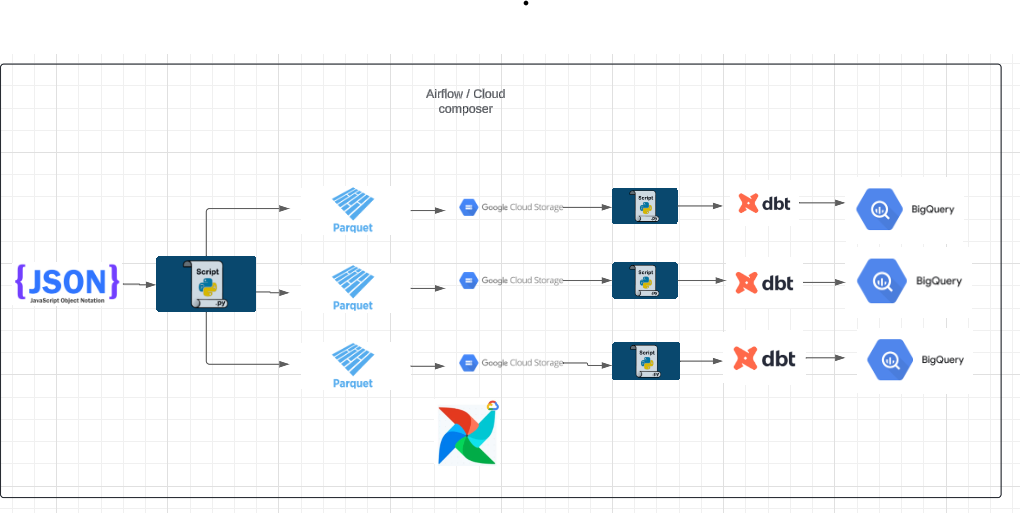

1. **Ingesta de Datos**:
   - Se parte de archivos **JSON**, que contienen los datos sin procesar.

2. **Transformación Inicial**:
   - Un script en **Python** se encarga de convertir estos archivos JSON en archivos **Parquet**, un formato de almacenamiento columnar que optimiza tanto el espacio como la velocidad de acceso.

3. **Almacenamiento en Google Cloud Storage**:
   - Los archivos Parquet se almacenan en **Google Cloud Storage (GCS)**, lo que proporciona escalabilidad y durabilidad, y facilita la integración con otros servicios de Google Cloud.

4. **Orquestación con Airflow/Cloud Composer**:
   - Se utiliza **Airflow/Cloud Composer** para la orquestación del pipeline, lo que permite la ejecución automatizada y monitorizada de cada paso del proceso.

5. **Transformaciones Avanzadas con dbt**:
   - **dbt** (Data Build Tool) se encarga de realizar transformaciones más avanzadas sobre los datos almacenados en **BigQuery**. Esto incluye la normalización, agregación, y cualquier otro tipo de procesamiento necesario para preparar los datos para análisis o reporting.

6. **Carga en BigQuery**:
   - Finalmente, los datos transformados se cargan en **BigQuery**, donde pueden ser consultados y utilizados para análisis de alto rendimiento.

## Reflexión

Aunque me habría gustado implementar esta solución más robusta y alineada con las prácticas de **Ingeniería de Datos**, el tiempo limitado me llevó a optar por una solución más directa, centrada en el desafío original. Sin embargo, considero que este enfoque propuesto podría ser un excelente camino a seguir en futuras iteraciones o proyectos similares.
